In [80]:
import pandas as pn
import numpy as np
from sklearn import datasets
from sklearn import naive_bayes
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plot

# Наивный байесовский классификатор

### Датасет digits

In [81]:
digits = datasets.load_digits()
for digit in digits.data[:3]:
    print digit.reshape((8, 8))
print digits.target[:3]

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]
[[  0.   0.   0.  12.  13.   5.   0.   0.]
 [  0.   0.   0.  11.  16.   9.   0.   0.]
 [  0.   0.   3.  15.  16.   6.   0.   0.]
 [  0.   7.  15.  16.  16.   2.   0.   0.]
 [  0.   0.   1.  16.  16.   3.   0.   0.]
 [  0.   0.   1.  16.  16.   6.   0.   0.]
 [  0.   0.   1.  16.  16.   6.   0.   0.]
 [  0.   0.   0.  11.  16.  10.   0.   0.]]
[[  0.   0.   0.   4.  15.  12.   0.   0.]
 [  0.   0.   3.  16.  15.  14.   0.   0.]
 [  0.   0.   8.  13.   8.  16.   0.   0.]
 [  0.   0.   1.   6.  15.  11.   0.   0.]
 [  0.   1.   8.  13.  15.   1.   0.   0.]
 [  0.   9.  16.  16.   5.   0.   0.   0.]
 [  0.   3.  13.  16.  16.  11.   5.   0.]
 [  0.   

64 целочисленных признака

### Датасет breast_cancer

In [82]:
cancer = datasets.load_breast_cancer()
print cancer.data[:3]
print cancer.target[:30]

[[  1.79900000e+01   1.03800000e+01   1.22800000e+02   1.00100000e+03
    1.18400000e-01   2.77600000e-01   3.00100000e-01   1.47100000e-01
    2.41900000e-01   7.87100000e-02   1.09500000e+00   9.05300000e-01
    8.58900000e+00   1.53400000e+02   6.39900000e-03   4.90400000e-02
    5.37300000e-02   1.58700000e-02   3.00300000e-02   6.19300000e-03
    2.53800000e+01   1.73300000e+01   1.84600000e+02   2.01900000e+03
    1.62200000e-01   6.65600000e-01   7.11900000e-01   2.65400000e-01
    4.60100000e-01   1.18900000e-01]
 [  2.05700000e+01   1.77700000e+01   1.32900000e+02   1.32600000e+03
    8.47400000e-02   7.86400000e-02   8.69000000e-02   7.01700000e-02
    1.81200000e-01   5.66700000e-02   5.43500000e-01   7.33900000e-01
    3.39800000e+00   7.40800000e+01   5.22500000e-03   1.30800000e-02
    1.86000000e-02   1.34000000e-02   1.38900000e-02   3.53200000e-03
    2.49900000e+01   2.34100000e+01   1.58800000e+02   1.95600000e+03
    1.23800000e-01   1.86600000e-01   2.41600000e-01 

30 вещественных признака

In [83]:
# подсчет средней ошибки для метода кросс-валидации
def compute_cross_val_score(model, x, y):
    return cross_val_score(model, x, y).mean() # параметры по умолчанию

models = [naive_bayes.BernoulliNB(), naive_bayes.MultinomialNB(), naive_bayes.GaussianNB()]
score_digits = [compute_cross_val_score(model, digits.data, digits.target) for model in models]
print 'Digits score', score_digits

score_cancer = [compute_cross_val_score(model, cancer.data, cancer.target) for model in models]
print 'Cancer score', score_cancer

Digits score [0.82582365077805819, 0.87087714897350532, 0.81860038035501381]
Cancer score [0.62742040285899936, 0.89457904019307521, 0.9367492806089297]


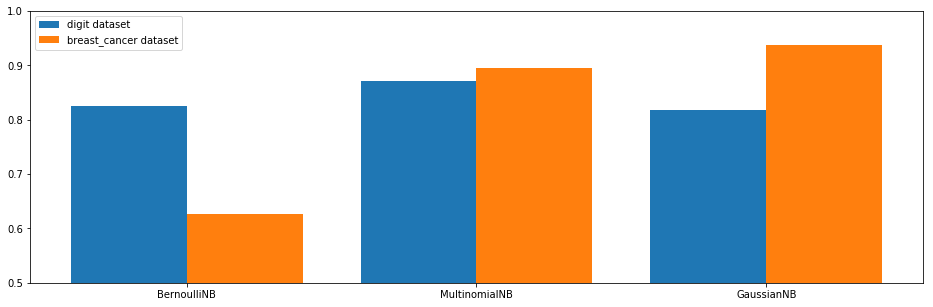

In [84]:
plot.figure(figsize=(16,5))
pos = np.array([0, 1, 2])
plot.bar(pos - 0.2, score_digits, width=0.4, label="digit dataset")
plot.bar(pos + 0.2, score_cancer, width=0.4, label="breast_cancer dataset")
plot.xticks(pos, ('BernoulliNB', 'MultinomialNB', 'GaussianNB'))
# plot.scatter([0, 1, 2], score_cancer, label="breast_cancer dataset")
plot.ylim((0.5, 1))
plot.legend()
plot.show()

### Выводы по полученным результатам
Согласно полученным результатам, максимальное качество классификации на датасете digits получено при использовании мультиномиального распределения (score=0.87), однако значение score при использовании других исследуемых распределений отличается не более чем на 0.06, что довольно статистически мало значимо.

Максимального качества на датасете breast_cancer удалось достигнуть используя нормальное распределение (score=0.93). Примечательно, что распределение Бернулли для данного датасета показывает заметно более плохие результаты(score=0.62).

Из предложенных утверждений:
<ol>
<li>НЕ верно. Вполне логично: вещественный параметр имеет скорее всего абсолютно непрерывное распределение.</li>
<li>НЕ верно. По той же причине. Однако оно уже лучше, чем распределение Бернулли, поскольку принимает не бинарные значения.</li>
<li>НЕ верно, согласно результатам. Что не совсем понятно.</li>
<li>Верно. Оно хотя бы абсолютно непрерывно.</li>
</ol>